In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import seaborn as sns

# Definimos los vectores Q, K y V de manera manual para facilitar la comprensión
Q = torch.tensor([[1.0, 0.0], [0.0, 1.0], [1.0, 1.0]])  # Query: 3 tokens, dimensión 2
K = torch.tensor([[1.0, 0.0], [0.0, 1.0], [1.0, 1.0]])  # Key: 3 tokens, dimensión 2
V = torch.tensor([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])  # Value: 3 tokens, dimensión 2

In [2]:
# Dimensión de los vectores
d_k = Q.size(-1)

# Producto punto escalado entre Q y K
scaled_dot_product = torch.matmul(Q, K.T) / torch.sqrt(torch.tensor(d_k, dtype=torch.float32))

In [3]:
# Aplicamos softmax para obtener los pesos de atención
attention_weights = F.softmax(scaled_dot_product, dim=-1)

In [4]:
# Calculamos la salida de la función de atención
attention_output = torch.matmul(attention_weights, V)

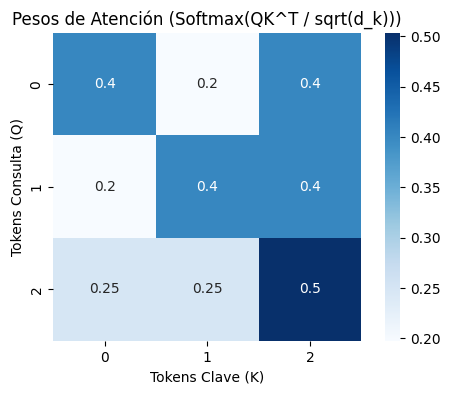

In [5]:
# Visualizamos los pesos de atención
plt.figure(figsize=(6, 4))
sns.heatmap(attention_weights.detach().numpy(), annot=True, cmap='Blues', cbar=True, square=True)
plt.title('Pesos de Atención (Softmax(QK^T / sqrt(d_k)))')
plt.xlabel('Tokens Clave (K)')
plt.ylabel('Tokens Consulta (Q)')
plt.show()